# HR Promotion clasification Problem

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

- They first identify a set of employees based on recommendations/ past performance
- Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
- At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

- Attribute Information:

- employee_id	Unique ID for employee
- department	Department of employee
- region	Region of employment (unordered)
- education	Education Level
- gender	Gender of Employee
- recruitment_channel	Channel of recruitment for employee
- no_of_trainings	no of other trainings completed in previous year on soft - skills, technical skills etc.
- age	Age of Employee
- previous_year_rating	Employee Rating for the previous year
- length_of_service	Length of service in years
- KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
- awards_won?	if awards won during previous year then 1 else 0
- avg_training_score	Average score in current training evaluations
- is_promoted	(Target) Recommended for promotion

# Importing required libraries for the project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading Performence dataset from git hub account

In [5]:
Perfdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/data/Promotion_Cleanup.csv')

In [6]:
Perfdf.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPI_Score,awards_won,avg_training_score,is_promoted,depart_Analytics,depart_Finance,depart_HR,depart_Legal,depart_Operations,depart_Procurement,depart_R&D,depart_Sales & Marketing,depart_Technology,reg_region_1,reg_region_10,reg_region_11,reg_region_12,reg_region_13,reg_region_14,reg_region_15,reg_region_16,reg_region_17,reg_region_18,reg_region_19,reg_region_2,reg_region_20,reg_region_21,reg_region_22,reg_region_23,reg_region_24,reg_region_25,reg_region_26,reg_region_27,reg_region_28,reg_region_29,reg_region_3,reg_region_30,reg_region_31,reg_region_32,reg_region_33,reg_region_34,reg_region_4,reg_region_5,reg_region_6,reg_region_7,reg_region_8,reg_region_9,recchan_other,recchan_referred,recchan_sourcing
0,2,0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


- Number of rows and columns in the dataset

In [7]:
Perfdf.shape

(54808, 56)

- There are 54808 rows and 56 columns in the above dataset

- Information about dataset like datatype,count etc

In [8]:
Perfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   education                 54808 non-null  int64  
 1   gender                    54808 non-null  int64  
 2   no_of_trainings           54808 non-null  int64  
 3   age                       54808 non-null  int64  
 4   previous_year_rating      54808 non-null  float64
 5   length_of_service         54808 non-null  int64  
 6   KPI_Score                 54808 non-null  int64  
 7   awards_won                54808 non-null  int64  
 8   avg_training_score        54808 non-null  int64  
 9   is_promoted               54808 non-null  int64  
 10  depart_Analytics          54808 non-null  int64  
 11  depart_Finance            54808 non-null  int64  
 12  depart_HR                 54808 non-null  int64  
 13  depart_Legal              54808 non-null  int64  
 14  depart

- Checking null values in dataset

In [9]:
Perfdf.isna().sum()

education                   0
gender                      0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPI_Score                   0
awards_won                  0
avg_training_score          0
is_promoted                 0
depart_Analytics            0
depart_Finance              0
depart_HR                   0
depart_Legal                0
depart_Operations           0
depart_Procurement          0
depart_R&D                  0
depart_Sales & Marketing    0
depart_Technology           0
reg_region_1                0
reg_region_10               0
reg_region_11               0
reg_region_12               0
reg_region_13               0
reg_region_14               0
reg_region_15               0
reg_region_16               0
reg_region_17               0
reg_region_18               0
reg_region_19               0
reg_region_2                0
reg_region_20               0
reg_region_21               0
reg_region

# K Neigbours clasifier
 
- 0- is not promoted
- 1- is promoted

In [10]:
X = Perfdf.drop('is_promoted',axis=1)
y = Perfdf.is_promoted
X.shape, y.shape

((54808, 55), (54808,))

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LogisticReg = LogisticRegression()

In [14]:
LogisticReg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
model_score = cross_val_score(LogisticReg,X,y,scoring='accuracy',cv=10)
model_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.92519613, 0.91534392, 0.92154716, 0.92483124, 0.91826309,
       0.92428389, 0.92209451, 0.91899288, 0.92992701, 0.92737226])

In [17]:
model_score.mean()

0.9227852088901674

In [18]:
cossmean={}
for cv in range(2,20):
  cvmean = cross_val_score(LogisticReg,X,y,scoring='accuracy',cv=cv)
  cossmean[cv]=cvmean.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [19]:
cossmean

{2: 0.9225113122171946,
 3: 0.9215807454668838,
 4: 0.9221099109619033,
 5: 0.923824892358156,
 6: 0.9219821748615266,
 7: 0.923606050316204,
 8: 0.9220916654502992,
 9: 0.9233871626699847,
 10: 0.9227852088901674,
 11: 0.9223108614909464,
 12: 0.9224932016927445,
 13: 0.9231316596117355,
 14: 0.9228397967354499,
 15: 0.9232046869425689,
 16: 0.9224019946224875,
 17: 0.922073419938695,
 18: 0.9228216289410724,
 19: 0.9229493658090643}

In [22]:
max(zip(cossmean.values(),cossmean.keys()))

(0.923824892358156, 5)

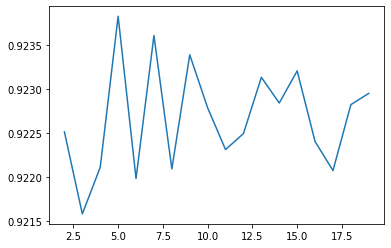

In [23]:
plt.plot(list(cossmean.keys()),list(cossmean.values()))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report